In [1]:
# Loading libraries required and reading dataset into python
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm

In [2]:
# Reading in dataset
df = pd.read_csv('used_cars.csv',encoding = 'latin-1')
df.head()

,vin,year,manufacturer,make,color,condition,cylinders,drive,fuel,odometer,transmission,type,size,city,title,price
0,WBXHT3C30G5E48663,2016,BMW,X1,grey,NaN,4,NaN,gas,79297.0,automatic,SUV,full-size,brooklyn,clean,12999.0
1,NaN,2007,toyota,Camry,NaN,NaN,NaN,NaN,gas,NaN,automatic,NaN,NaN,brooklyn,clean,1000.0
2,WP1AA2A20CLA11062,2012,porsche,CAYENNE,white,NaN,NaN,NaN,gas,81936.0,automatic,SUV,NaN,brooklyn,clean,13999.0
3,NaN,2007,mercedes-benz,s550,,excellent,NaN,NaN,gas,109221.0,automatic,sedan,NaN,brooklyn,clean,6500.0
4,NaN,2018,nissan,sentra,grey,salvage,4,fwd,gas,66.0,automatic,sedan,compact,brooklyn,salvage,9000.0


In [3]:
df = df.drop(['vin'],axis = 1)

In [4]:
df['color'].fillna('unkown',inplace = True)
df['condition'].fillna('unknown',inplace = True)
df['cylinders'].fillna('unknown',inplace = True)
df['transmission'].fillna('unknown',inplace = True)
df['type'].fillna('unknown',inplace = True)
df['size'].fillna('unknown',inplace = True)
df['title'].fillna('unknown',inplace = True)
df['make'].fillna('unknown',inplace = True)
df['drive'].fillna('unknown',inplace = True)

In [5]:
new_df = df[df['price'] >= 1000]
price_df = new_df[new_df['price'] <= 200000]
rec_df = price_df[price_df['odometer'] > 10000 ]
#rec_df = sec_df[sec_df['odometer'] <=  ]
rec_df.shape

(4737, 15)

In [6]:
rec_df['odometer'].describe()

count    4.737000e+03
mean     8.097432e+04
std      5.422366e+04
min      1.012500e+04
25%      4.429100e+04
50%      7.415900e+04
75%      1.055790e+05
max      1.152111e+06
Name: odometer, dtype: float64

In [7]:
missing = rec_df.isna().sum()
missing = missing[missing>0]
missing_percent = missing/rec_df.shape[0] * 100
df_missing = pd.DataFrame([missing, missing_percent], index = ['total', 'missing percent']).T
df_missing.sort_values(['missing percent'], ascending = [False])

,total,missing percent
fuel,46.0,0.971079
manufacturer,4.0,0.084442


In [8]:
rec_df = rec_df.dropna()
rec_df.shape

(4687, 15)

In [9]:
rec_df.dtypes

year              int64
manufacturer     object
make             object
color            object
condition        object
cylinders        object
drive            object
fuel             object
odometer        float64
transmission     object
type             object
size             object
city             object
title            object
price           float64
dtype: object

In [10]:
rec_df['odometer'] = rec_df.odometer.astype(int)
rec_df['year'] = rec_df.year.astype(object)

In [11]:
categori = ['object']
categorical = rec_df.select_dtypes(include= categori)

In [12]:
rec_df.head()

,year,manufacturer,make,color,condition,cylinders,drive,fuel,odometer,transmission,type,size,city,title,price
0,2016,BMW,X1,grey,unknown,4,unknown,gas,79297,automatic,SUV,full-size,brooklyn,clean,12999.0
2,2012,porsche,CAYENNE,white,unknown,unknown,unknown,gas,81936,automatic,SUV,unknown,brooklyn,clean,13999.0
3,2007,mercedes-benz,s550,,excellent,unknown,unknown,gas,109221,automatic,sedan,unknown,brooklyn,clean,6500.0
5,2010,mercedes-benz,benz,black,good,4,4wd,gas,143000,automatic,sedan,mid-size,brooklyn,clean,5000.0
6,2010,honda,accord,white,excellent,4,fwd,gas,121000,automatic,coupe,mid-size,brooklyn,clean,5000.0


In [13]:
rec_df = rec_df.applymap(lambda s:s.lower() if type(s) == str else s)

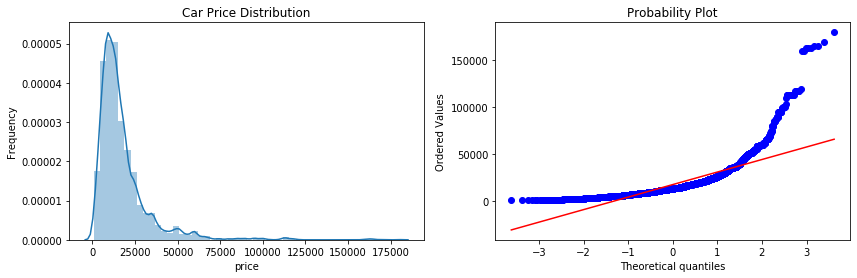

In [14]:
#histogram of SalePrice to see the distribution 
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
sns.distplot(rec_df['price'], ax = ax1)
ax1.set_ylabel('Frequency')
ax1.set_title('Car Price Distribution')
#QQ-plot
stats.probplot(rec_df['price'], plot=plt)
plt.show()


 mu = 9.50 and sigma = 0.74



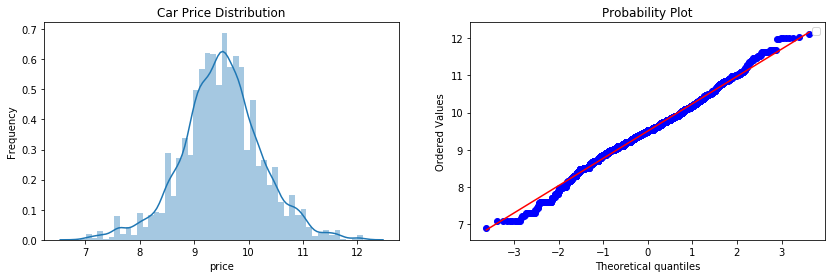

In [15]:
pricey_log = np.log1p(rec_df['price'])
#histogram of SalePrice to see the distribution after log transformation
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
sns.distplot(pricey_log, ax = ax1)
(mu, sigma) = norm.fit(pricey_log)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Car Price Distribution')
#QQ-plot
stats.probplot(pricey_log, plot=plt)
plt.show()

In [16]:
rec_df['price_log'] = np.log(rec_df['price'])
rec_df['odometer_log'] = np.log(rec_df['odometer']+10)

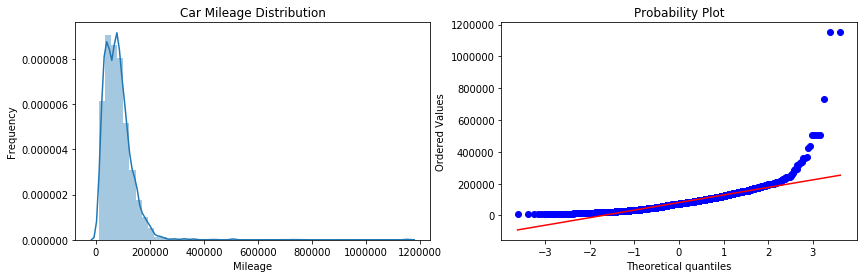

In [17]:
#histogram of the car mileage to see the distribution 
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
sns.distplot(rec_df['odometer'], ax = ax1)
ax1.set_xlabel('Mileage')
ax1.set_ylabel('Frequency')
ax1.set_title('Car Mileage Distribution')
#QQ-plot
stats.probplot(rec_df['odometer'], plot=plt)
plt.show()


 mu = 11.12 and sigma = 0.63



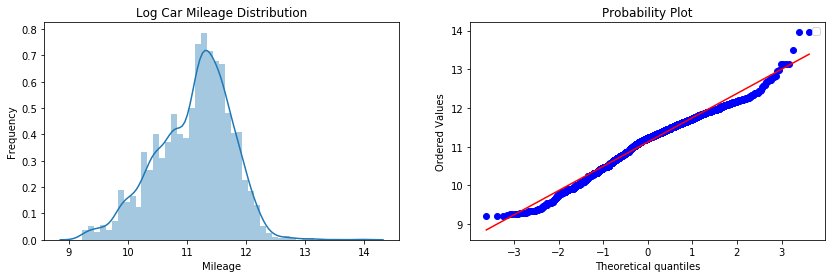

In [18]:
#histogram of SalePrice to see the distribution after log transformation
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
sns.distplot(rec_df['odometer_log'], ax = ax1)
(mu, sigma) = norm.fit(rec_df['odometer_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax1.set_xlabel('Mileage')
ax1.set_ylabel('Frequency')
ax1.set_title('Log Car Mileage Distribution')
#QQ-plot
stats.probplot(rec_df['odometer_log'], plot=plt)
plt.show()

In [19]:
rec_df.dtypes

year              int64
manufacturer     object
make             object
color            object
condition        object
cylinders        object
drive            object
fuel             object
odometer          int64
transmission     object
type             object
size             object
city             object
title            object
price           float64
price_log       float64
odometer_log    float64
dtype: object

The average age of the cars is 7 years old.
The average mileage of the cars is 81,320 miles.
The cheapest car is for $1,000 dollars and the most expensive is for $179,998.
The average car price is $17,681, while median is $13,499.
------------------------------


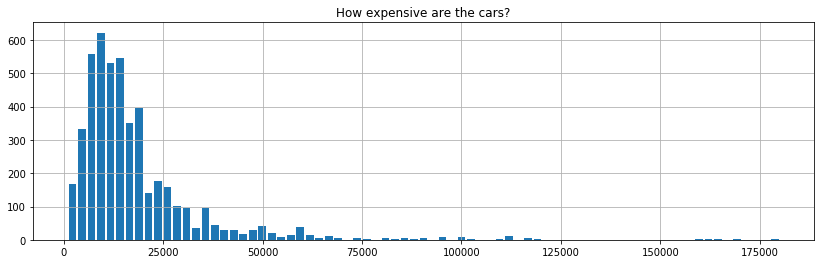

In [20]:
# How expensive are the cars? 
print('The average age of the cars is {:,.0f} years old.'.format(2020 - rec_df.year.mean()))
print('The average mileage of the cars is {:,.0f} miles.'.format(rec_df.odometer.mean()))
print('The cheapest car is for ${:,.0f} dollars and the most expensive is for ${:,.0f}.'.format(
    rec_df.price.min(), rec_df.price.max()))
print('The average car price is ${:,.0f}, while median is ${:,.0f}.'.format(
    rec_df.price.mean(), rec_df.price.median()))
print('-' * 30)
rec_df.price.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are the cars?')
plt.show()

In [21]:
categori = ['object']
categorical = rec_df.select_dtypes(include= categori)
categorical= categorical.drop(columns = ['make','manufacturer'],axis =1)

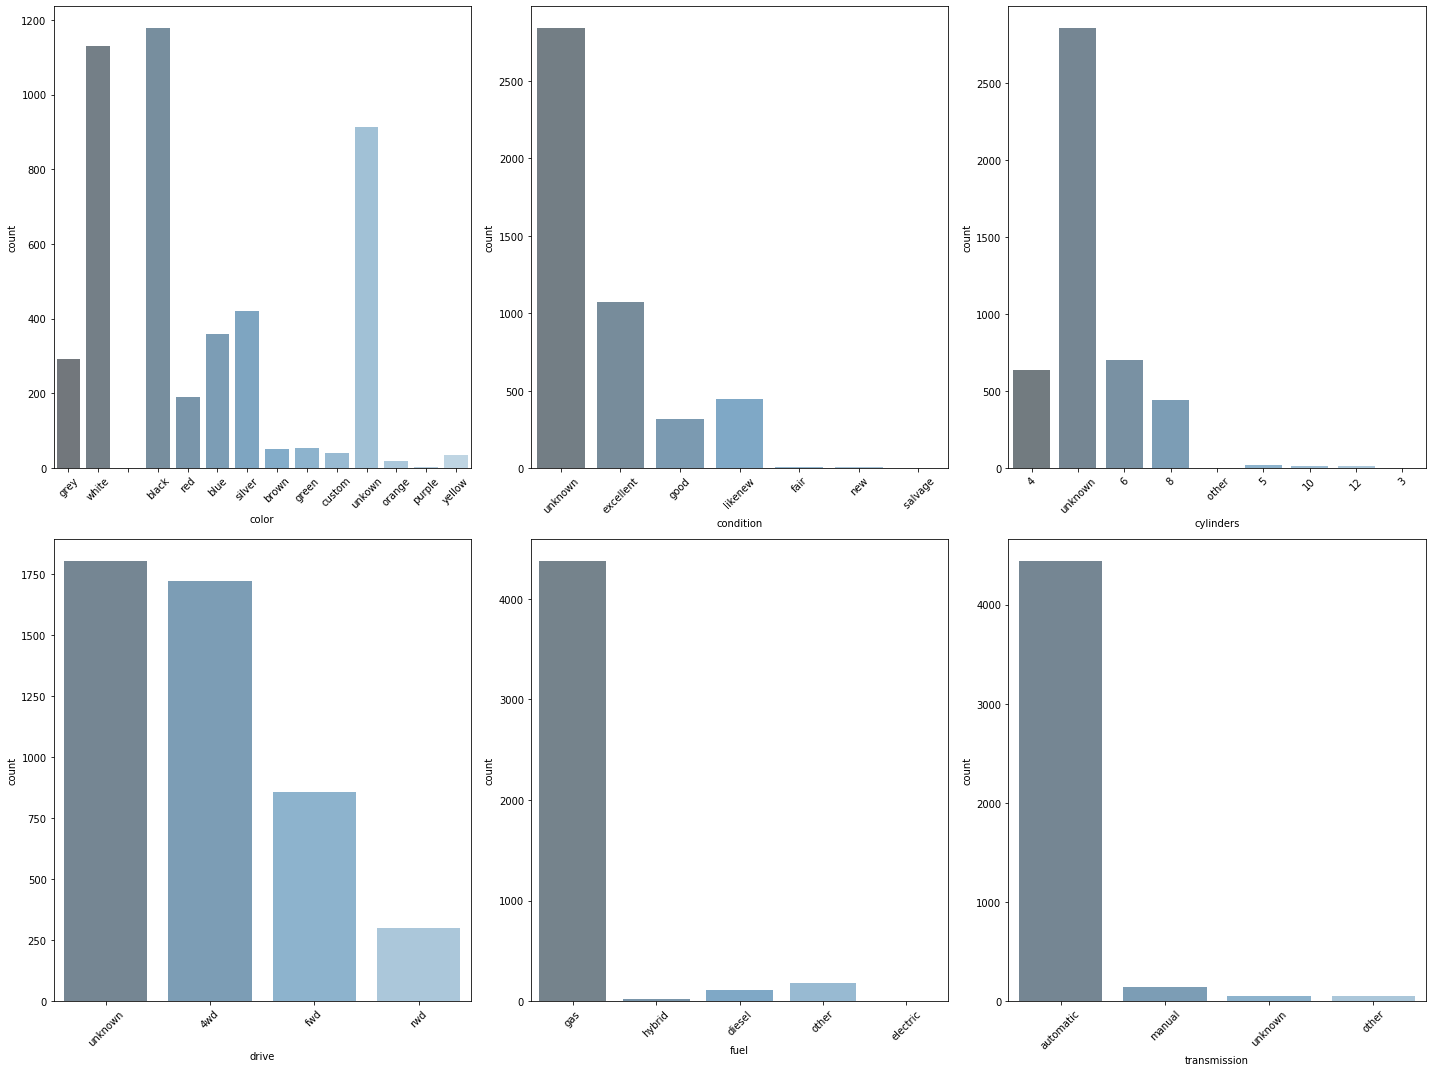

In [22]:
fig, axes = plt.subplots(round(len(categorical.columns) / 4), 3, figsize=(20,15))

for i, ax in enumerate(fig.axes):
    if i < len(categorical.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=categorical.columns[i], alpha=0.7, data=categorical, ax=ax,palette='Blues_d')

fig.tight_layout()

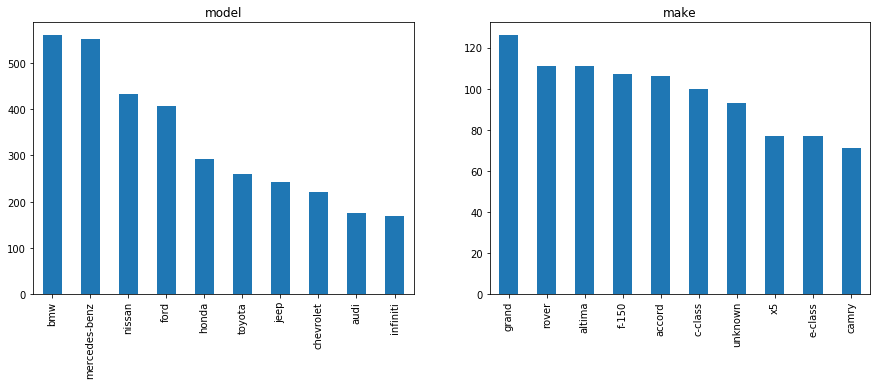

In [23]:
fig = plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.title('model')
rec_df['manufacturer'].value_counts().sort_values().nlargest(10).plot(kind = 'bar')
plt.xticks(rotation =90)
plt.subplot(1,2,2)
plt.title('make')
rec_df['make'].value_counts().sort_values().nlargest(10).plot(kind = 'bar')

In [24]:
rec_df.head()

,year,manufacturer,make,color,condition,cylinders,drive,fuel,odometer,transmission,type,size,city,title,price,price_log,odometer_log
0,2016,bmw,x1,grey,unknown,4,unknown,gas,79297,automatic,suv,full-size,brooklyn,clean,12999.0,9.472628,11.281082
2,2012,porsche,cayenne,white,unknown,unknown,unknown,gas,81936,automatic,suv,unknown,brooklyn,clean,13999.0,9.546741,11.313816
3,2007,mercedes-benz,s550,,excellent,unknown,unknown,gas,109221,automatic,sedan,unknown,brooklyn,clean,6500.0,8.779557,11.601220
5,2010,mercedes-benz,benz,black,good,4,4wd,gas,143000,automatic,sedan,mid-size,brooklyn,clean,5000.0,8.517193,11.870670
6,2010,honda,accord,white,excellent,4,fwd,gas,121000,automatic,coupe,mid-size,brooklyn,clean,5000.0,8.517193,11.703628


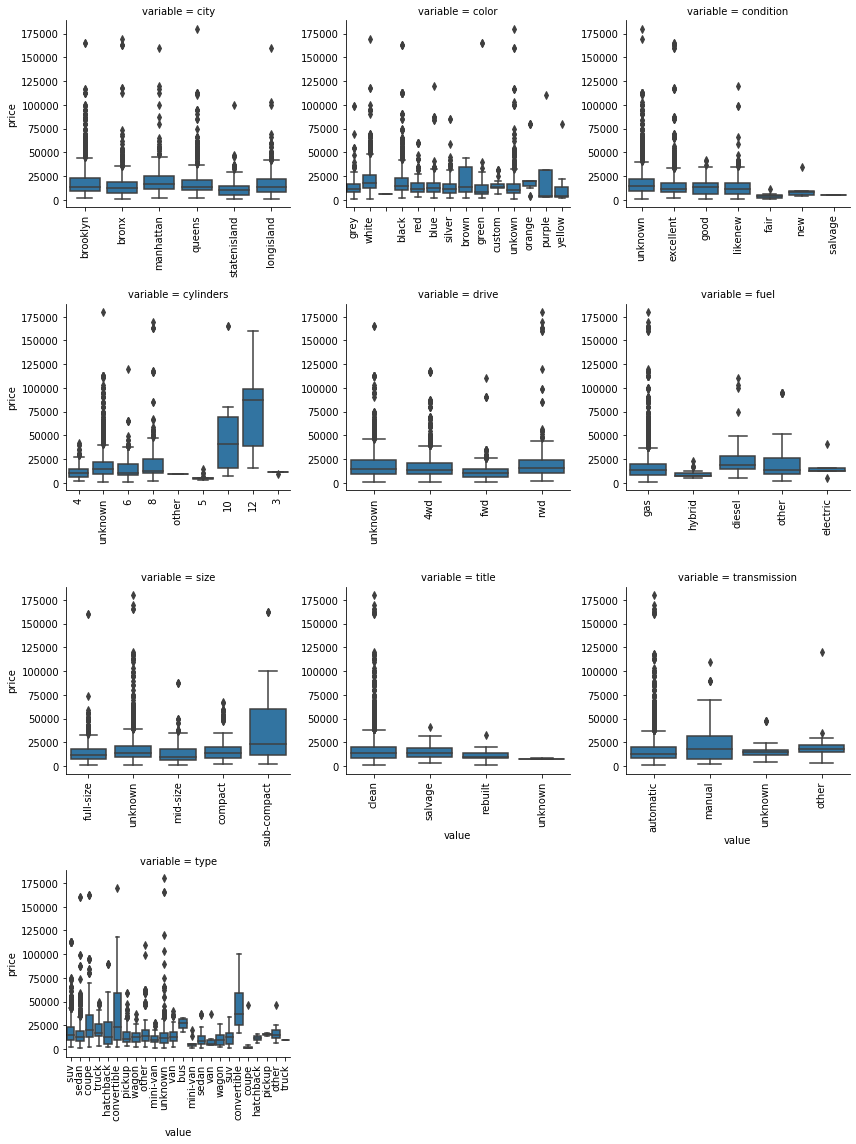

In [25]:
# Box Plot for Categorical Features
f = pd.melt(rec_df, id_vars=['price'], value_vars=sorted(categorical))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'price')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [26]:
rec_df['price_log'] = np.log(rec_df['price'])
rec_df['odometer_log'] = np.log(rec_df['odometer']+10)

In [27]:
rec_df.head()

,year,manufacturer,make,color,condition,cylinders,drive,fuel,odometer,transmission,type,size,city,title,price,price_log,odometer_log
0,2016,bmw,x1,grey,unknown,4,unknown,gas,79297,automatic,suv,full-size,brooklyn,clean,12999.0,9.472628,11.281082
2,2012,porsche,cayenne,white,unknown,unknown,unknown,gas,81936,automatic,suv,unknown,brooklyn,clean,13999.0,9.546741,11.313816
3,2007,mercedes-benz,s550,,excellent,unknown,unknown,gas,109221,automatic,sedan,unknown,brooklyn,clean,6500.0,8.779557,11.601220
5,2010,mercedes-benz,benz,black,good,4,4wd,gas,143000,automatic,sedan,mid-size,brooklyn,clean,5000.0,8.517193,11.870670
6,2010,honda,accord,white,excellent,4,fwd,gas,121000,automatic,coupe,mid-size,brooklyn,clean,5000.0,8.517193,11.703628


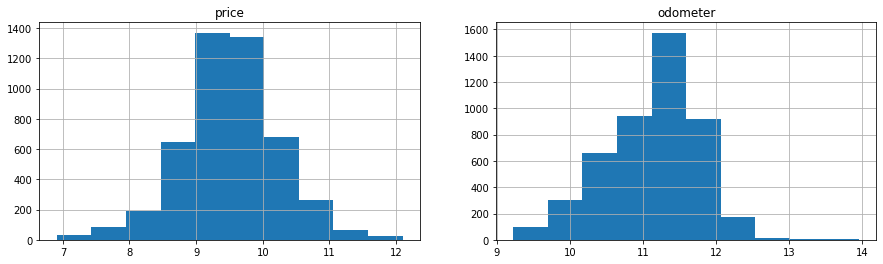

In [28]:
fig = plt.figure(figsize= (15,4))
plt.subplot(1,2,1)
plt.title('price')
rec_df['price_log'].hist()
plt.subplot(1,2,2)
plt.title('odometer')
rec_df['odometer_log'].hist()
plt.show()